In [1]:
import requests
def connected_to_internet(url='http://www.google.com/', timeout=5):
    try:
        _ = requests.get(url, timeout=timeout)
        return True
    except requests.ConnectionError:
        print("No internet connection available.")
    return False

connected_to_internet()

True

In [ ]:
#!pip install -r requirements.txt
#!pip install fxcmpy
#!pip install forexconnect
#!pip install sklearn
#!pip install statsmodels
#!pip install matplotlib
#!pip install ipywidgets

In [3]:
import os
import threading
import time
import importlib
import sys
mpath = os.getcwd() + '/lib'
sys.path.append(mpath)

In [87]:
#from forexconnect import fxcorepy
import fxcmpyi
import pandas as pd
import matplotlib

import SharedObjects
import pairs
importlib.reload(SharedObjects)
importlib.reload(fxcmpyi)
importlib.reload(pairs)
#importlib.reload(sklearn)

import numpy as np

In [5]:
#fxcmpy.__version__

minutes: m1, m5, m15 and m30,
hours: H1, H2, H3, H4, H6 and H8,
one day: D1,
one week: W1,
one month: M1.

In [6]:
#Set variables
T = 'm1' #Period
sz = 300; #Size
prs = dict()
mlr = dict()

Get access token from https://tradingstation.fxcm.com.

demo - for account type demo

real - for account type real

In [13]:
con = None
def custom():
    global con
    try:
        def login():
            global con
            TOKEN = '2720337434ea557dea25bad4cd9ad392d70f620d'
            con = fxcmpyi.fxcmpy(access_token=TOKEN, log_level='error', server='demo')
        threading.Thread(target=login).start()
    except:
        custom()
custom()
#con.close()

In [17]:
if con is not None:
    print(con.is_connected())
    shd_obj = SharedObjects.SharedObjects(con)

True


In [18]:
#Function to update data
def price_update(data, dataframe):
    symbol = data['Symbol']
    if (len(prs) > 1):
        mlr[symbol] = prs.get(symbol).multiple_linear_regression(prs)

In [19]:
try:
    def get_past_prices():
        for symbol in shd_obj.tradable_pairs:
            dtf = shd_obj.historical_data(symbol, T, sz)
            if symbol not in prs:
                prs[symbol] = pairs.Pair(symbol, dtf)
                shd_obj.stream_data(symbol, (price_update, prs.get(symbol).on_price_update) )
            
    threading.Thread(target=get_past_prices).start()
except:
    print("Error: unable to start thread")

In [36]:
shd_obj.unstream_data()

In [ ]:
#con.close()

In [ ]:
#status = shd_obj.get_status()
#if(status == 'You are logged in'):
    #shd_obj.stream_data(T, sz, price_update)

In [ ]:
##Reverses the dataframe rows
#df[::-1]

#c = df.drop(columns=['tickvolume'])
#dates[0].minute
#dates[0].hour

#con.is_subscribed(instruments[0])
#con.get_subscribed_symbols()

#con.unsubscribe_market_data('EUR/USD')
#print(shd_obj.pairs)
#con.close()

In [ ]:
#con.get_default_account()
#con.get_prices('EUR/USD')

In [ ]:
#import inspect
#source_file_DF = inspect.getsource(pd.concat)
#print(source_file_DF)

In [134]:
from sklearn import * 
import statsmodels.api as sm

def reg(x,y):
    regr = linear_model.LinearRegression()
    x_constant = pd.concat([x,pd.Series([1]*len(x),index = x.index)], axis=1)
    regr.fit(x_constant, y)    
    beta = regr.coef_[0]
    alpha = regr.intercept_
    spread = y - x*beta - alpha
    return spread

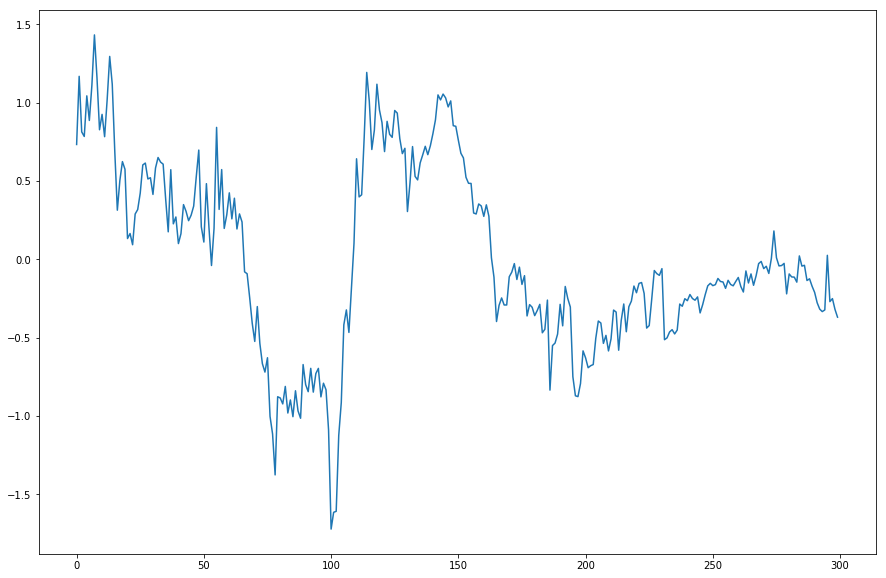

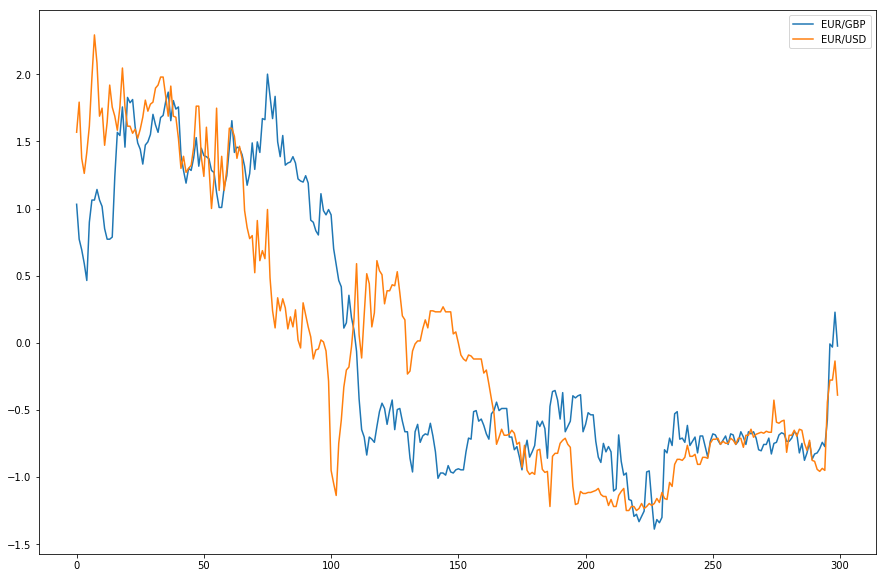

In [164]:


lm = linear_model.LinearRegression()
        #for key in prs:
keys = set(prs.keys())
excludes = set(['EUR/USD'])
diff = keys.difference(excludes)

b = list()
for ky in diff:
    ky = 'EUR/GBP'
    dtf = pd.DataFrame()
    yy = prs.get('EUR/USD').prices['Close'].tolist()
    y_np = np.array(yy)
    standardized_y = ((y_np-y_np.mean())/y_np.std() ).tolist()
    
    xx = prs.get(ky).prices['Close'].tolist()
    x_np = np.array(xx)
    standardized_x = ((x_np-x_np.mean())/x_np.std() ).tolist()
    
    dtf[ky] = standardized_x
    dtf['EUR/USD'] = standardized_y
    b = reg(dtf[ky], dtf['EUR/USD'])

b.plot(figsize = (15,10))
dtf.plot(figsize = (15,10))


In [165]:
#Tradable pairs have p-value < 0.0
adf = sm.tsa.stattools.adfuller(b, maxlag=1)
print('ADF test statistic: %.02f' % adf[0])
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))
print('p-value: %.03f' % adf[1])
print(adf)

ADF test statistic: -2.76
	1%: -3.452
	5%: -2.871
	10%: -2.572
p-value: 0.064
(-2.761966188459294, 0.0639153570232637, 1, 298, {'1%': -3.4524859843440754, '5%': -2.871288184343229, '10%': -2.571964047565425}, -179.50914392273864)
